## **Airbnb EDA Project**

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**
1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Wrangling:**

4.**Data Analysis and Visualization:**

# **Problem Statements** -

**Find number of room types and frequency?**

**Average price of property**

**most number of active host as per location.**

**the highest and lowest rent according  to location**

**Most Popular host of Airbnb**

**Total no. of nights spend per room types**

**Top ten Highest listing neighourhood**



# ***Let's Begin !***

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'

In [6]:
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.shape

(48895, 16)

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [11]:
airbnb_df = df.dropna()

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [13]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [14]:
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [15]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Find number of room types and frequency?

In [16]:
airbnb_room_type = airbnb_df.room_type.unique()
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [17]:
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())
airbnb_roomtype_frequency

{'Entire home/apt': 25393, 'Private room': 22306, 'Shared room': 1159}

Text(0.5, 1.0, 'Count of Listed Rooms')

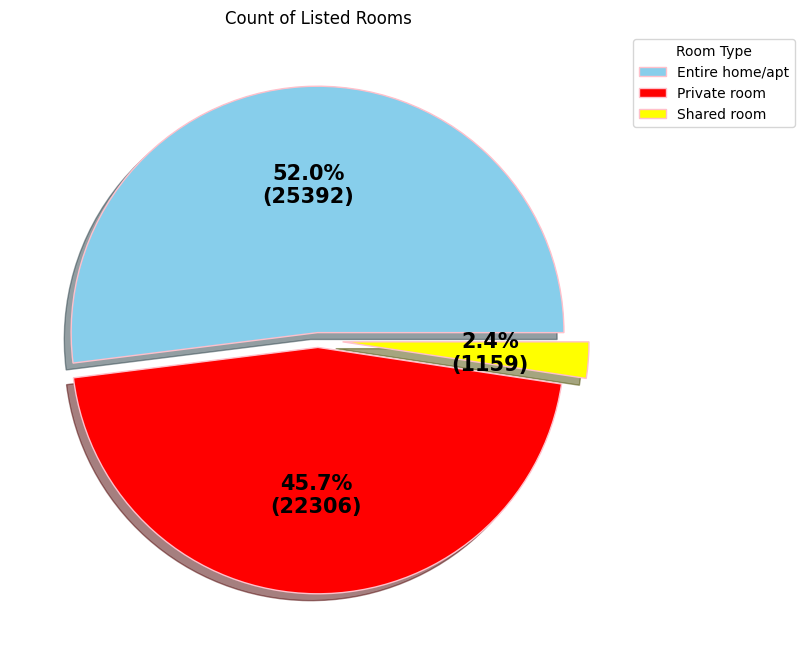

In [18]:
room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())


colors = ( "skyblue", "red", "yellow",)
explode = (0.03, 0.03, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")

**Entire home/apt type has most number of count.**

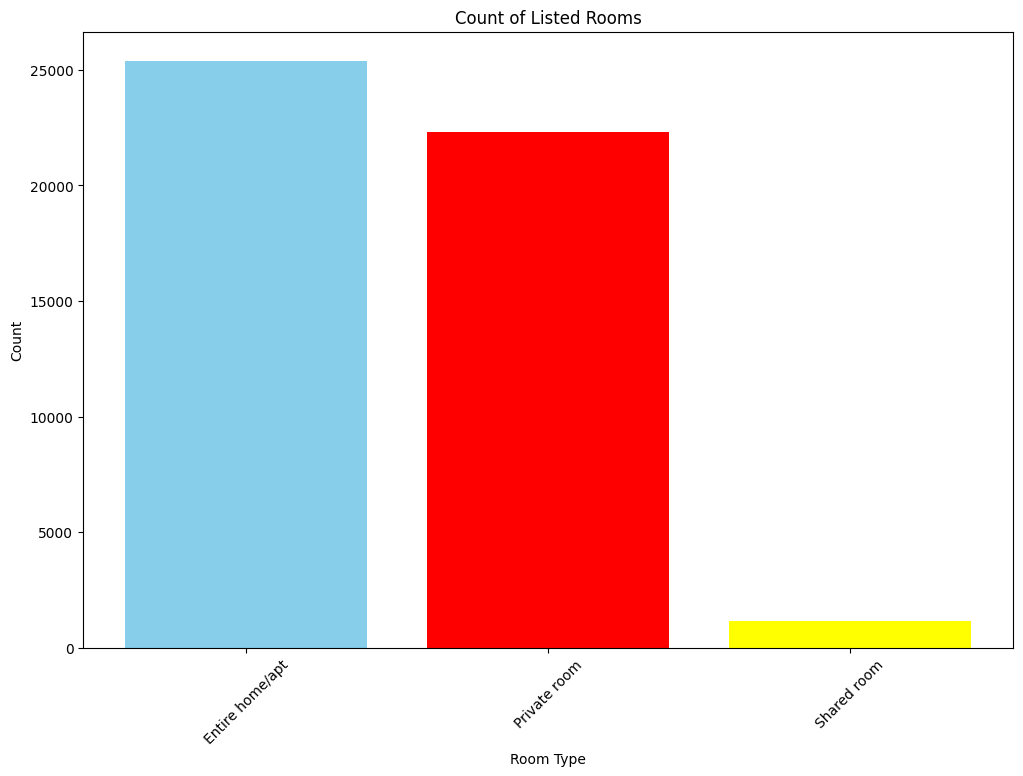

In [19]:
room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

plt.figure(figsize=(12, 8))
plt.bar(room_type, data, color=['skyblue', 'red', 'yellow'])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Listed Rooms')
plt.xticks(rotation=45)
plt.show()

#What is the average price of property?

In [20]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [21]:
#Average_price of property according
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [22]:
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

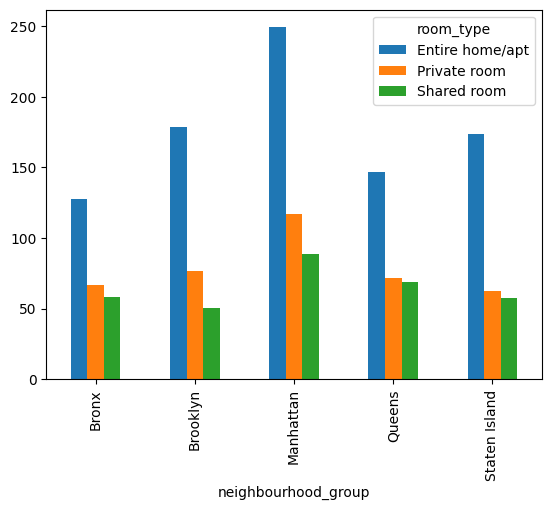

In [23]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

**Average price of Entire home/apt is most in Manhattan then others.**

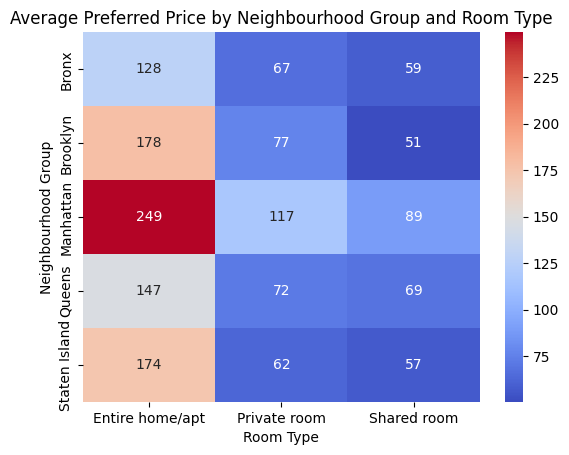

In [24]:
sns.heatmap(avg_preffered_price_df, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Average Preferred Price by Neighbourhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.show()

#most number of active host as per location.

In [65]:
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=True).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
4,Staten Island,373
0,Bronx,1089
3,Queens,5664
1,Brooklyn,20089
2,Manhattan,21643


<Axes: >

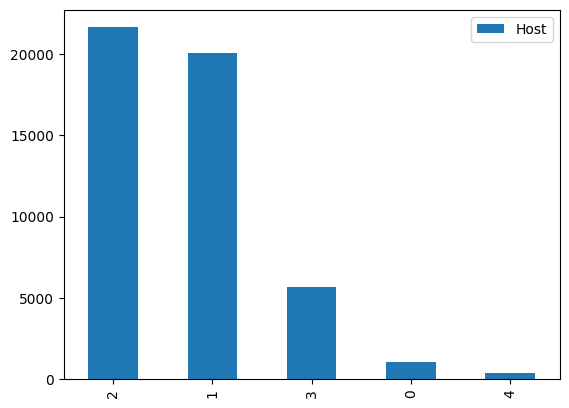

In [26]:
no_of_host_per_location.plot.bar()

#the highest and lowest rent according  to location

In [27]:
max_price_df = airbnb_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [28]:
min_price_df = airbnb_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,10
4,Staten Island,13


#Points to be noted:



1. There are some entries in dataset in which minimum nights = 1 but it's  price is 0

 Solution: We replace the price value with the mean value of price

In [29]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [30]:
#Get the number of values which price is less than 100$
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()

21861

In [31]:
airbnb_price_df = airbnb_df.copy()

In [32]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1) ,round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) , airbnb_price_df['price']
   )

In [33]:
#Find the observations where price is 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [34]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [35]:
#Replace the value of price according to minimum night where price = 0$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] == 0) ,price_calculator(airbnb_price_df['minimum_nights']) , airbnb_price_df['price'])

In [36]:
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [37]:
min_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [38]:
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,20
4,Bronx,2500,20


In [39]:
merge_price_df_copy = merge_price_df.copy()

In [40]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  new_max_price = np.log2(values)

  return new_max_price

In [41]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

In [42]:
#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,3.321928
1,Manhattan,13.287712,3.321928
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,4.321928
4,Bronx,11.287712,4.321928


Text(0.5, 1.0, 'Maximum and minimum price according to location')

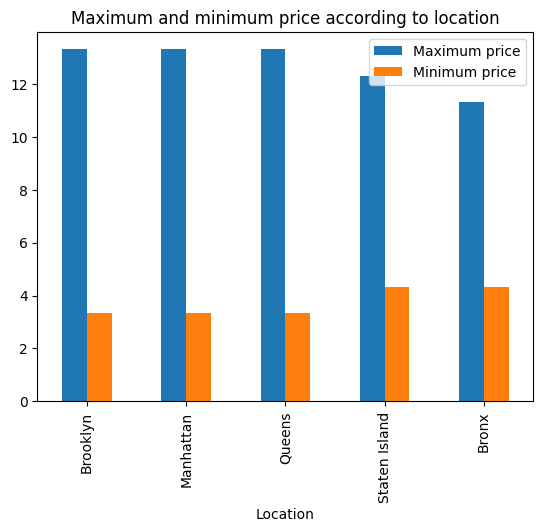

In [43]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

#Most Popular host of Airbnb


In [44]:
#Get the host based on number of reviews
host_based_on_review_df = airbnb_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_based_on_review_df

,host_id,host_name,number_of_reviews
21294,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18619,26432133,Danielle,2017
20863,35524316,Yasu & Akiko,1971
21911,40176101,Brady,1818
...,...,...,...
21799,39706334,Erin,0
21802,39724060,Jaime,0
21806,39731713,Polina,0
21812,39765154,Dave,0


In [45]:
#Get the host based on availability in a year
host_based_on_availability_df = airbnb_df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
host_based_on_availability_df

,host_id,host_name,availability_365
0,2438,Tasos,0.0
22244,41764756,Luz,0.0
22243,41762539,Maria,0.0
22242,41760536,Austin,0.0
22241,41757762,Sara,0.0
...,...,...,...
1787,746552,Tom,365.0
27208,76862848,Alexis,365.0
22042,40733012,Victor,365.0
1829,772862,Jesse,365.0


In [46]:
#Merge two dataframe based on number of reviews and availability in a year
popular_host_df = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year'})

popular_host_df

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0
...,...,...,...,...
37133,37360127,Mel,0,365.0
37137,37424221,Trevor,0,365.0
37225,35741633,Chen,0,365.0
37248,40834217,Jay,0,365.0


In [47]:
#Most popular top 5 host
popular_host_df.head()

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0


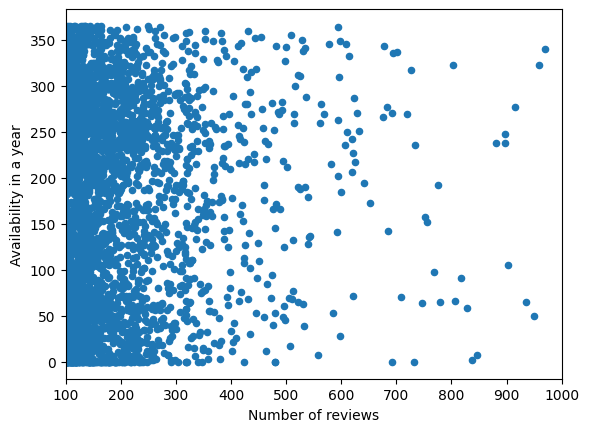

In [48]:
#Create scatter plot based on number of reviews and availability in a year
popular_host_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000));

# Total no. of nights spend per room types

In [51]:
total_room=df.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

,room_type,minimum_nights
2,Shared room,7511
1,Private room,120067
0,Entire home/apt,216152


<Axes: xlabel='room_type', ylabel='count'>

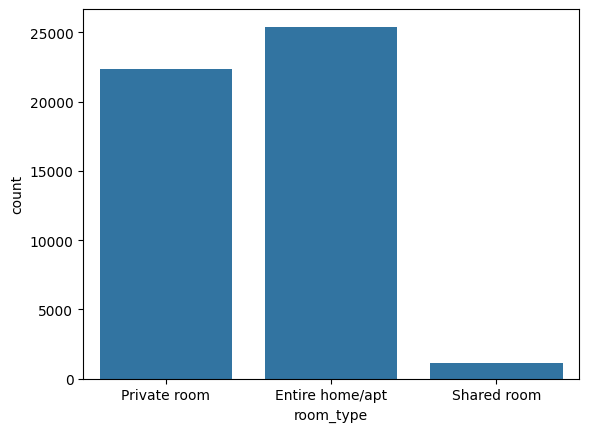

In [54]:
sns.countplot(x="room_type", data=df)

In [57]:
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
explode = (0.07, 0.07, 0.07)

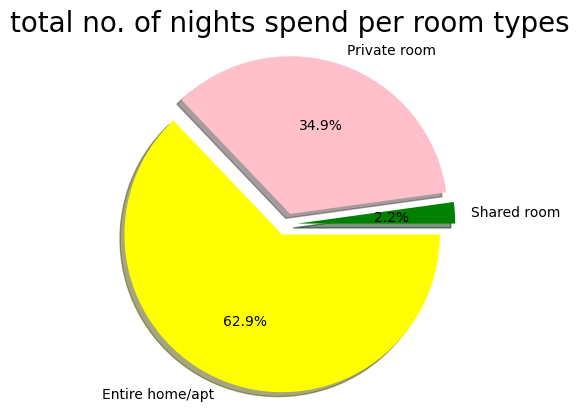

In [58]:
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")
plt.show()

**Most number of nights is spend in Entire home/apt.**

# Top ten Highest listing neighourhood

In [59]:
neighour=airbnb_df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
top_10=neighour[:10]
top_10

,neighbourhood,count
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
5,Hell's Kitchen,1954
6,East Village,1852
7,Upper East Side,1797
8,Crown Heights,1563
9,Midtown,1545


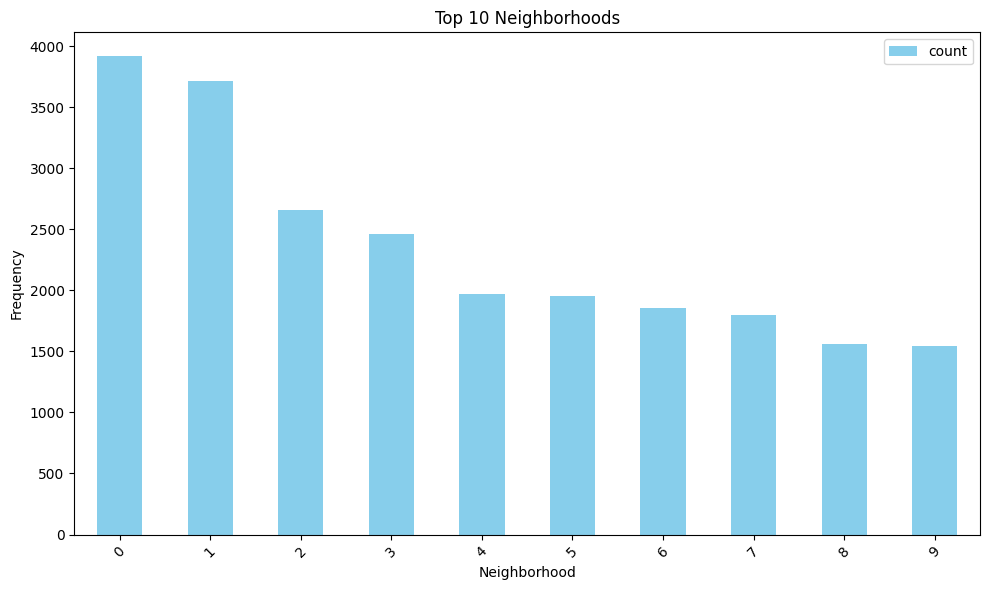

In [64]:
top_10.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Williamsburg i the highest listing neighourhood**

#Conclusion

*   Manhattan is the most focused place
*   Customers pay highest amount in Brooklyn,Queens and Manhattan that is 10,
    000 and lowest amount is 10$.
* For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.
* 'Entire home/apt' room type has the highest number of listing and ‘Shared Room’ is the least listed room type.
* Williamsburg i the highest listing neighourhood.
* Most number of nights is spend in Entire home/apt.